In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

from utils import DataSet, generate_features_for_smiles, grid_search, plot_results

pd.set_option('display.max_rows', None)

Model: LMA_RF_200 not found, creating new model...
Performing grid search...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....max_depth=20, n_estimators=100;, score=0.916 total time=  26.2s
[CV 3/5] END ....max_depth=20, n_estimators=100;, score=0.914 total time=  26.2s
[CV 4/5] END ....max_depth=20, n_estimators=100;, score=0.920 total time=  26.2s
[CV 5/5] END ....max_depth=20, n_estimators=100;, score=0.926 total time=  26.3s
[CV 2/5] END ....max_depth=20, n_estimators=100;, score=0.925 total time=  26.3s
Best estimator score: 0.9199965872548631
Best params: {'max_depth': 20, 'n_estimators': 100}
Test R2 score: 0.927
Saved model to: models/LMA_RF_200.joblib


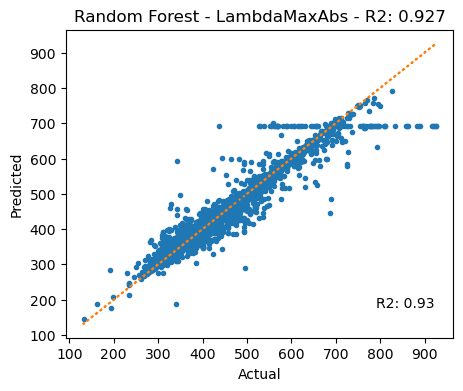

In [2]:
lma_data = DataSet(target="LambdaMaxAbs", fill_na="drop", drop_features=["Ipc"])

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_params = {
    "n_estimators": [100],
    "max_depth": [20],
}

grid, y_pred, r2 = grid_search(
    estimator=rf, params=grid_params, data=lma_data, model_name="LMA_RF_200"
)

plot_results(
    y=lma_data.y_test["LambdaMaxAbs"],
    y_hat=y_pred,
    title=f"Random Forest - LambdaMaxAbs - R2: {r2:.3f}",
)

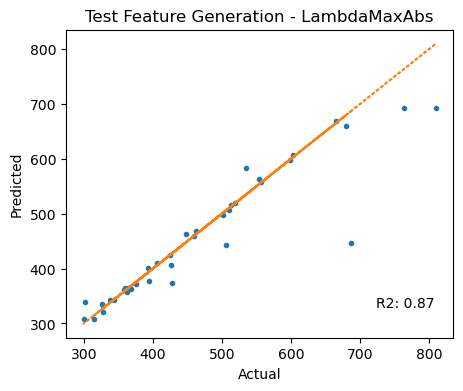

In [3]:
# Testing feature generation functions
sample_y = lma_data.y_test.sample(40, random_state=42)
smiles = sample_y['SMILES'].tolist()

features_df = generate_features_for_smiles(
    smiles,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)

pred_from_features = grid.predict(features_df)

plot_results(
    y=sample_y["LambdaMaxAbs"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LambdaMaxAbs",
)

In [4]:
sample_y.head()

,SMILES,SELFIES,LambdaMaxAbs
18646,O=C1/C(=C2\Nc3cc4ccc5cccc6ccc(c3C2=O)c4c56)Nc2...,[O][=C][/C][=Branch2][Ring1][P][=C][\N][C][=C]...,687.0
12222,CCNc1ccc2c(C(F)(F)F)cc(=O)oc2c1,[C][C][N][C][=C][C][=C][C][Branch1][=Branch2][...,394.0
14624,CCN1c2ccc(-c3cc(-c4ccccc4)[nH]n3)cc2Sc2cc(-c3c...,[C][C][N][C][=C][C][=C][Branch2][Ring1][C][C][...,338.0
19254,C#CCNC1=C2C=CC=[N+]2[B-](F)(F)n2cccc21,[C][#C][C][N][C][=C][C][=C][C][=N+1][Ring1][Br...,406.0
18973,COc1cc2oc(=O)c3c4ccc(C=O)cc4c4ccc5cccc6c(c1)c2...,[C][O][C][=C][C][O][C][=Branch1][C][=O][C][=C]...,425.0


In [5]:
features_df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.072758,14.072758,0.154567,-0.154567,0.158393,510.552,492.408,510.136828,184,0,...,0,0,0,0,0,0,0,0,0,0
1,12.750251,12.750251,0.075671,-4.575504,0.839593,257.211,247.131,257.066363,96,0,...,0,0,0,0,0,0,0,0,0,0
2,4.616701,4.616701,0.889259,0.889259,0.243830,511.654,486.454,511.183067,184,0,...,0,0,0,0,0,0,0,0,0,0
3,14.259084,14.259084,0.295898,-3.813413,0.613986,245.041,234.961,245.093584,90,0,...,0,0,0,1,0,0,0,0,0,0
4,13.279579,13.279579,0.385333,-0.385333,0.148299,402.405,388.293,402.089209,146,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# now look at fluorene test data
# load belfield_LMA.parquet
belfield_LMA = pd.read_parquet('data/belfield_LMA.parquet')
# rename LMA column to "LambdaMaxAbs"
belfield_LMA.rename(columns={'LMA2 (nm) assume hexane': 'LambdaMaxAbs'}, inplace=True)
belfield_LMA.head()

,smiles,LambdaMaxAbs
1,O=P(OCC)(OCC)C1=CC=C(C=CC=2C=CC=3C4=CC=C(C=C4C...,383.0
2,O=N(=O)C1=CC=C(C=CC=2C=CC=3C4=CC=C(C=C4C(C3C2)...,414.0
4,N1=C(SC2=CC=CC=C12)C3=CC=C4C5=CC=C(C=C5C(C4=C3...,392.0
6,C=1C=CC(=CC1)N(C=2C=CC=CC2)C=3C=CC=4C5=CC=C(C=...,378.0
9,N1=C(SC=2C=CC=CC12)C3=CC=C4C5=CC=C(N)C=C5C(C4=...,380.0


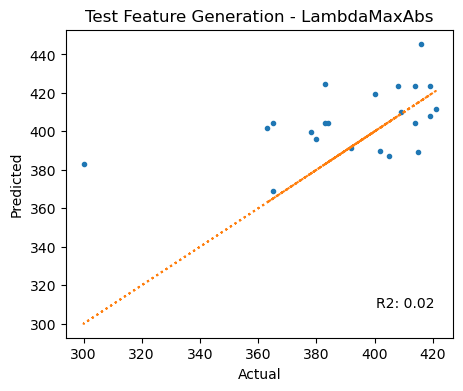

In [12]:
# Testing feature generation functions with belfield dataset
smiles_belfield = belfield_LMA['smiles'].tolist()

belfield_features_df = generate_features_for_smiles(
    smiles_belfield,
    descriptors=grid.feature_names_in_, # type: ignore
    missing_value=None,
    log_missing=True)

pred_from_features = grid.predict(belfield_features_df)

plot_results(
    y=belfield_LMA["LambdaMaxAbs"],
    y_hat=pred_from_features,
    title=f"Test Feature Generation - LambdaMaxAbs",
)